In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import time
import os
import pickle
import shutil
import zipfile
from pathlib import Path
from os import listdir
import sys
from fpdf import FPDF, HTMLMixin
from PIL import Image

In [2]:
data = []
resultColumnName = ''
models = []
models2 = []
X_train = []
y_train = []
columns = []
mostImportantFeatures = []
ticks = 0

class Model:
    name = ''
    model = ''
    forFilename = ''
    def __init__(self, n, m, f): 
        self.name = n
        self.model = m 
        self.forFilename = f

class Score():
    name = ''
    forFilename = ''
    score = 0
    def __init__(self, n, s, f): 
        self.name = n
        self.score = s
        self.forFilename = f
    def __repr__(self):
        return "name: '{0}', score: {1}".format(self.name, self.score)

class Statistics():
    initResultCounts = []
    describeTable = [] 
    scores = []   
    reportId = ''
    mostImportatnt = []
    modelNames = []

def initModels():
    return [
#         Model('LogisticRegression',LogisticRegression( multi_class = 'auto'),'logreg'),
        Model('DecisionTreeClassifier(max_depth=3)',DecisionTreeClassifier(max_depth=3),'tree'),
        Model('KNeighborsClassifier',KNeighborsClassifier(),'kn'),
        Model('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis(),'lin'),
#         Model('GaussianNB',GaussianNB(),'gaus'),
    ]
def zipdir(path, ziph):
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

In [3]:
# trainModels()

In [4]:
# analyze('j')

In [3]:
def trainModels(filename):
    global models
    global models2
    global mostImportantFeatures
    global ticks
    initData(filename)    
    models = initModels()    
    models2 = initModels()
    for index in range(len(models)):
        curr = models[index]
        curr.model.fit(X_train, y_train.values.ravel())
            
    #choose the most important features
    X = data.loc[:, data.columns != resultColumnName]
    y = data.loc[:, data.columns == resultColumnName].values.ravel()
    model = ExtraTreesClassifier(n_estimators = 10)
    model.fit(X,y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    mostImportantFeatures = feat_importances.nlargest(2).keys()
            
    for index in range(len(models2)):
        curr = models2[index].model
        X_mat = X_train[mostImportantFeatures].values
        y_mat = y_train.values        
        curr.fit(X_mat, y_mat)
        
    ticks = round(time.time())
    path = os.getcwd() + '\\files\\trained\\' + str(ticks)
    os.mkdir(path)
    
    for index in range(len(models)):
        curr = models[index]
        filename = path + '\\models_' + str(index) +'.sav'
        pickle.dump(curr, open(filename, 'wb'))
            
    for index in range(len(models2)):
        curr = models2[index]
        filename = path + '\\models2_' + str(index) +'.sav'
        pickle.dump(curr, open(filename, 'wb'))
    
    filename = path + '\\features'
    pickle.dump(mostImportantFeatures, open(filename, 'wb'))    
        
    shutil.make_archive(os.getcwd() + '\\files\\trained\\' + str(ticks) , 'zip', os.getcwd() + '\\files\\trained\\' + str(ticks) )

    shutil.rmtree(os.getcwd() + '\\files\\trained\\' + str(ticks) )
    return os.getcwd() + '\\files\\trained\\' + str(ticks) + '.zip'

In [6]:
# trainModels()

,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Class Freedom
0,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10,10,2
1,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70,70,3
2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30,30,1
3,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30,40,2
4,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55,60,2


In [4]:
def initData(filename):    
    global data
    global resultColumnName
    global models
    global models2
    global X_train
    global y_train
    global columns
    
    data = pd.read_csv(filename, delimiter=';')
    #features that will participate in learning
    columns = ['Property Rights', 'Judical Effectiveness', 'Government Integrity',
           'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
           'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
           'Investment Freedom ', 'Financial Freedom',
               #'Country Name', 'CountryID', 'Region',
             'Class Freedom']
    data = data[columns]
    resultColumnName = 'Class Freedom'

    
    #transforming data
    scaler = MinMaxScaler()
    X_train = data.loc[:, data.columns != resultColumnName]
    #X_train = scaler.fit_transform(data.loc[:, data.columns != resultColumnName])
    y_train = data.loc[:, data.columns == resultColumnName]
    

In [5]:
def analyze(filename, zipName):
    global data
    global resultColumnName
    global models
    global modelFor2
    global X_train
    global y_train 
    global mostImportantFeatures
    global statistics

    initData(filename)
    
    models = []
    models2 = []
    mostImportantFeatures = []
    
    unpackedPath = os.getcwd() + '\\files\\unpacked\\' + (Path(zipName).stem)
    with zipfile.ZipFile(zipName, 'r') as zip_ref:
        zip_ref.extractall(unpackedPath)
    
    unpackedPath = unpackedPath + '\\'
    
    with open(unpackedPath + 'features', 'rb') as f:
        mostImportantFeatures = pickle.load(f)
    
    for f in listdir(unpackedPath):
        if(f.startswith('models_')):
            with open(unpackedPath + f, 'rb') as file:
                models.append(pickle.load(file))
        if(f.startswith('models2_')):
            with open(unpackedPath + f, 'rb') as file:
                models2.append(pickle.load(file))
    
    
    shutil.rmtree(unpackedPath)
    
    statistics =  Statistics()
    #counts of y classes
    statistics.initResultCounts = data.groupby(resultColumnName).size()
    statistics.describeTable = data.describe()
    statistics.mostImportatnt = mostImportantFeatures
       
    statistics.scores = []
    statistics.modelNames = []
    for index in range(len(models)):
        curr = models[index]
        statistics.scores.append(Score(curr.name, curr.model.score(X_train, y_train), curr.forFilename))
        statistics.modelNames.append(curr.forFilename)
      
    
    tick = str(round(time.time()))
    statistics.reportId = tick
    imagesPath = os.getcwd() + '\\static\\reports\\' + tick
    os.mkdir(imagesPath)
    imagesPath = imagesPath + '\\'
    
    for index in range(len(models2)):
        plot_results(X_train, y_train, models2[index].model,models2[index].name, mostImportantFeatures, 
                                   imagePath = imagesPath + 'report2_' + models[index].forFilename)
    
    for index in range(len(models)):
        y_predict = models[index].model.predict(X_train)
        plot_classification_report(y_predict, y_train, title = models[index].name, 
                                   imagePath = imagesPath + 'report1_' + models[index].forFilename)
        
    
    data2 = pd.read_csv(filename, delimiter=';')
    distByRegion = data2[['Class Freedom','Region']]
    distByRegion['Region'] = distByRegion['Region'].str.replace('Middle East and North Africa', 'Middle East \nand North Africa')
    distByRegion = distByRegion.pivot_table(
        index=['Class Freedom'], columns='Region',
        fill_value=0, aggfunc=np.size
    )
    distByRegion = distByRegion.transpose()    
    fig = distByRegion.plot(kind = 'bar', rot=0, figsize = (10,8)).get_figure()
    fig.savefig(imagesPath + 'dist_by_regions.png')
    
    savePdf(tick, statistics)
    
    data2Desc = data2.describe().transpose()

    indexArray = data2Desc.index.values.tolist()
    data2Desc['feature'] = indexArray

    testd = data2Desc.to_numpy().tolist()
    testd.insert(0, data2Desc.columns.to_list())
    statistics.describeTable = testd
    
    return statistics;

In [8]:
# initData('data.csv')

['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [182]:
# from flask import jsonify

# from flask import Flask, make_response, request
# app = Flask(__name__)
# with app.app_context():
#     jsonResponse = {
#         'test': testd,
#     }

#     jsonify(jsonResponse)

In [118]:
# type(data.describe().transpose().to_records())

numpy.recarray

In [115]:
# data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Property Rights,186.0,52.046237,19.928304,0.0,37.000,50.00,65.700,97.4
Judical Effectiveness,186.0,44.658065,18.353433,0.0,31.000,42.90,54.675,92.4
Government Integrity,186.0,41.247312,19.972454,0.0,26.600,35.50,50.300,96.7
Tax Burden,186.0,74.722043,18.865848,0.0,70.425,77.25,85.275,99.8
Govt Spending,186.0,63.168280,24.352493,0.0,50.575,68.35,81.750,96.6
Fiscal Health,186.0,64.932258,32.589752,0.0,34.225,80.00,91.000,100.0
Business Freedom,186.0,63.172581,16.430392,0.0,54.025,63.90,74.975,96.4
Labor Freedom,186.0,58.803226,15.545021,0.0,50.400,59.70,68.350,91.0
Monetary Freedom,186.0,74.266667,13.597574,0.0,70.675,77.75,81.675,88.0
Trade Freedom,186.0,72.663978,16.241074,0.0,65.850,76.00,83.950,95.0


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


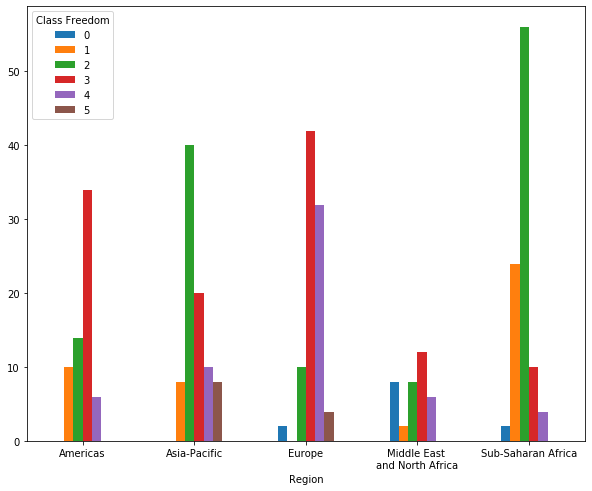

In [101]:
# # distByRegion.rename(index={1: "Mirth Africa"})
# distByRegion.rename(index={1: 'a'})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'C:\\Users\\user\\Documents\\laba\\analilzer\\files\\trained\\1591015967.zip'

In [12]:
# analyze(filename, zipName)

In [15]:
class HeatmapData:
    value = ''
    precision = 0
    recall = 0
    f1Score = 0
    count = 0
heatmaps = []

def show_values(pc, fmt="%.2f", **kw):
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=10, figure_height=10, 
            correct_orientation=False, cmap='RdBu', imagePath = ''):

    # Plot it out
    fig, ax = plt.subplots()    
#     c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

#     plt.show()
    
    plt.savefig(imagePath + '.png')
    


def plot_classification_report(y_predict, y_train, title='Classification report ', cmap='RdBu' , imagePath = ''):      
    y_trained = np.concatenate(y_train.values)
    heatmaps = []  
    for val in np.unique(y_train.values):
        heat = HeatmapData()
        heat.value = val
        true_positive = 0
        false_positive = 0
        true_negatives = 0
        false_negatives = 0
        count = 0

        for i in range(len(y_train)):
            if(y_trained[i] == y_predict[i] == val):
                true_positive = true_positive + 1
            if(y_trained[i] == y_predict[i] and y_trained[i] != val):
                false_negatives = false_negatives + 1
            if(y_trained[i] != y_predict[i] and y_trained[i] == val):
                false_positive = false_positive + 1
            if(y_trained[i] != y_predict[i] and y_trained[i] != val):
                true_negatives = true_negatives + 1
            if(y_trained[i] == val):
                count = count + 1
        if(true_positive+false_positive!=0):
            heat.precision = true_positive/(true_positive+false_positive)
        if(true_positive+false_negatives!=0):
            heat.recall = true_positive/(true_positive+false_negatives)
        if(heat.precision + heat.recall!=0):
            heat.f1Score = 2* heat.precision * heat.recall  /(heat.precision + heat.recall )
        heat.count = count
        heatmaps.append(heat)       


    classes = np.unique(y_train.values)
    plotMat =  []
    for heat in heatmaps:
        plotMat.append([heat.precision, heat.recall, heat.f1Score])
    support = list(map(lambda x: x.count,heatmaps))
    class_names = np.unique(y_train.values)

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, 
            figure_height, correct_orientation, cmap=cmap, imagePath = imagePath)

# analyze('h')
# for index in range(len(models)):
#     y_predict = models[index].model.predict(X_train)
#     plot_classification_report(y_predict, y_train, title = models[index].name)   

In [18]:

def plot_results(X, y, model, title, mostImportantFeatures, imagePath):
    X_mat = X[mostImportantFeatures].values
#     X_mat = plot_results_scaler.fit_transform(X_mat)
    y_mat = y.values

    colors_array = ['#FF0000', '#00FF00','#AFAFAF','#FFD700','#BA55D3','#008B8B']
    # Create color maps
    #['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF','#FFFF00','#800080','#00FFFF']
    cmap_light = ListedColormap(colors_array) #expected
    cmap_bold  = ListedColormap(colors_array) #predicted
    
    mesh_step_size = 1  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 3, X_mat[:, 0].max() + 3
    y_min, y_max = X_mat[:, 1].min() - 3, X_mat[:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))      
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=np.concatenate(y.values), cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patches = []
    for x in range(len(y[resultColumnName].unique())):
        patches.append(mpatches.Patch(color=colors_array[x]))
#     plt.legend(handles=patches)
        
#     plt.xlabel('height (cm)')
#     plt.ylabel('width (cm)')
    plt.title(title)
    
#     plt.show()
    plt.savefig(imagePath + '.png')


In [136]:
# filename = 'C:\\Users\\user\\Documents\\laba\\analilzer\\files\\upload\\data.csv'
# zipName = 'C:\\Users\\user\\Documents\\laba\\analilzer\\files\\upload\\1591015513.zip'

# trainModels(filename)
# analyze(filename, zipName)

In [134]:
def savePdf(ticks, statistics):
    def get_concat_h(im1, im2):
        dst = Image.new('RGB', (im1.width + im2.width, im1.height))
        dst.paste(im1, (0, 0))
        dst.paste(im2, (im1.width, 0))
        return dst

    class MyFPDF(FPDF, HTMLMixin):
        pass

    pdf = MyFPDF(orientation='L', format='A4')
    pdf.add_page()
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(250, 10, txt='Most important features', ln=1,)
    pdf.set_font('')
    pdf.cell(250, 10, txt=statistics.mostImportatnt[0] + ', '+ statistics.mostImportatnt[1] , ln=1)

    
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(250, 10, txt='Distribution by regions', ln=1,)
    pdf.set_font('')
    pdf.image(os.getcwd() + '\\static\\reports\\'+ticks+'\\dist_by_regions.png', h =120)
            
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(250, 10, txt='Model scores', ln=1,)
    pdf.set_font('')

    for score in statistics.scores:    
        pdf.cell(250, 10, txt=score.name + ': ' + str(score.score), ln=1,)

    pdf.set_font('Arial', 'B', 14)
    pdf.cell(250, 10, txt='Description table', ln=1,)

    width = 380 / (len(statistics.describeTable.columns))

    tableData = statistics.describeTable.transpose()
    pdf.set_font('Arial', 'B', 13)
    pdf.cell(width+30, 10, txt='')
    for column in tableData:    
        pdf.cell(width, 10, txt=column)

    pdf.set_font('Arial', '', 13)

    for index, row in tableData.iterrows():
        pdf.cell(1, 10, txt='', ln=1,)
        pdf.cell(width+30, 10, txt=str(index))
        for val in row:
            pdf.cell(width, 10, txt=str(round(val,2)))


    pdf.cell(1, 10, txt='', ln=1,)
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(250, 10, txt='Reports', ln=1,)
    pdf.set_font('')

    index = 0
    for score in statistics.scores:    
        pdf.cell(250, 10, txt=score.name + ': ' + str(score.score), ln=1,)    
        im1 = Image.open(os.getcwd() + '\\static\\reports\\'+ticks+'\\report2_'+statistics.modelNames[index]+'.png')
        im2 = Image.open(os.getcwd() + '\\static\\reports\\'+ticks+'\\report1_'+statistics.modelNames[index]+'.png')    
        get_concat_h(im1, im2).save(os.getcwd() + '\\static\\reports\\'+ticks+'\\report_'+statistics.modelNames[index]+'.png')
        pdf.image(os.getcwd() + '\\static\\reports\\'+ticks+'\\report_'+statistics.modelNames[index]+'.png', w =300)
        os.remove(os.getcwd() + '\\static\\reports\\'+ticks+'\\report_'+statistics.modelNames[index]+'.png')
        index = index + 1
       
    pdf.output(os.getcwd() + '\\static\\reports\\'+ticks+'\\' + "report.pdf")